In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("device_features.csv") #reading the file

In [4]:
df.head() #1st five rows

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,usb_connector,max_charging_power,bluetooth,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408
2,A135UZKAVZW,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,31-07-23 23:26,1080,2408
3,PAYB0000JP,Motorola,Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2...,16-06-23,01-05-23,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,30.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,Asia,23-07-23 19:14,720,1600
4,MC400,Motorola,Moto G53 5G 2022 Premium Edition TD-LTE LATAM ...,01-01-23,01-12-22,Lenovo,Lenovo,Motorola Penang,Haptic touch feedback,Smartphone,...,USB C reversible,18.0,Bluetooth 5.1,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,"North America,South America",23-07-23 15:52,720,1600


In [5]:
df.columns #checking out the different columns

Index(['oem_id', 'brand', 'model', 'released_date', 'announced_date',
       'hardware_designer', 'manufacturer', 'codename', 'general_extras',
       'device_category', 'width', 'height', 'depth', 'dimensions',
       'weight_gram', 'price', 'price_currency', 'platform',
       'operating_system', 'software_extras', 'cpu_clock', 'cpu', 'ram_type',
       'ram_capacity', 'non_volatile_memory_capacity', 'display_hole',
       'display_diagonal', 'horizontal_full_bezel_width',
       'display_area_utilization', 'pixel_density', 'display_type',
       'number_of_display_scales', 'display_refresh_rate',
       'graphical_controller', 'supported_cellular_bands', 'sim_card_slot',
       'usb', 'usb_services', 'usb_connector', 'max_charging_power',
       'bluetooth', 'WLAN', 'additional_sensors', 'battery_capacity',
       'market_regions', 'info_added_date', 'x_resolution', 'y_resolution'],
      dtype='object')

In [6]:
df['released_date_str'] = df['released_date'].astype(str)
split_dates = df['released_date_str'].str.split('-', expand=True)
#converting date into string and splitting it by '-' to extract month and year for visualisation

In [7]:
split_dates #expand=true so yhe splits recieved in diff columns

,0,1,2
0,28,03,22
1,28,03,22
2,28,03,22
3,16,06,23
4,01,01,23
...,...,...,...
1266,18,08,20
1267,01,10,20
1268,19,07,20
1269,16,07,20


In [8]:
df['release_year'] = split_dates[2] #extracting year
df['release_month'] = split_dates[1]#extracting month

In [13]:
years=df['release_year'].unique()
monthly_avg_gbp={}
for year in years:
    year_filter=df[(df['release_year']==year) & (df['price_currency']=='GBP')]
    monthly_avg=year_filter.groupby('release_month')['price'].mean()
    monthly_avg_gbp[year]=monthly_avg
    
#looping through every year and appending the mean of each month in the dict

In [14]:
monthly_avg_gbp

{'22': release_month
 01    1012.333333
 03     156.500000
 04     344.000000
 05     379.990000
 06     299.000000
 07     844.495000
 08    1246.500000
 09     557.888889
 10    1484.000000
 Name: price, dtype: float64,
 '23': release_month
 01     219.0
 02     999.0
 03     375.0
 06    1299.0
 Name: price, dtype: float64,
 '21': release_month
 01    1129.000
 02      79.990
 03     289.495
 04     464.000
 05     449.495
 06     269.000
 08     639.594
 09     509.000
 10     199.000
 12     399.000
 Name: price, dtype: float64,
 '20': release_month
 07     349.990000
 08     849.000000
 09     627.000000
 10     799.165000
 11    1043.444444
 Name: price, dtype: float64}

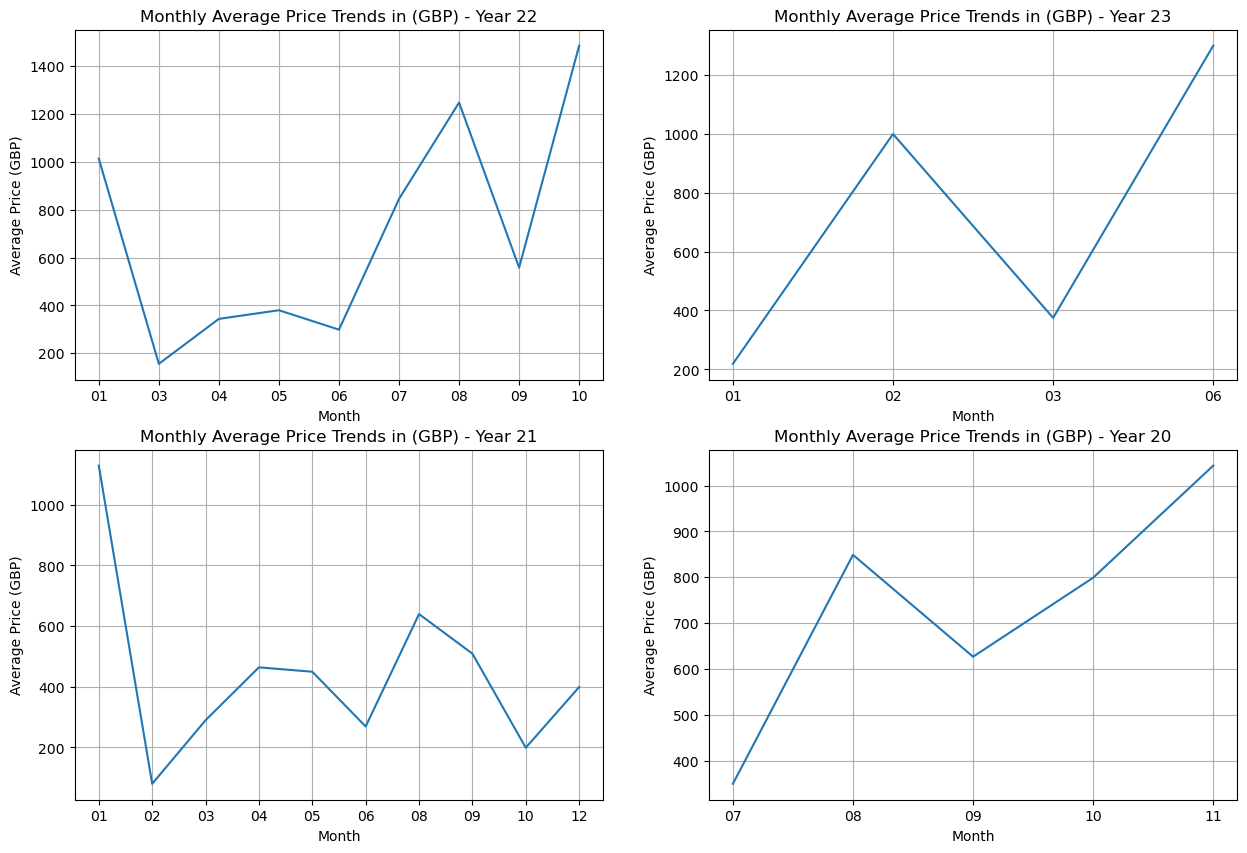

In [15]:
import matplotlib.pyplot as plt
i=0
plt.figure(figsize=(15, 10))
for year in years:
    plt.subplot(2, 2,i+1)
    plt.plot(monthly_avg_gbp[year])
    plt.title(f"Monthly Average Price Trends in (GBP) - Year {year}")
    plt.xlabel('Month')
    plt.ylabel('Average Price (GBP)')
    plt.grid(True)
    i += 1

plt.show()

#plotting seperate graph for each year